In [41]:
from Bio.Seq import Seq

In [42]:
# Create Sequence
seqA = Seq('AGCTTGCAGCGTCCGTTAGCTCGAGTCCAGGACGTTAGTCCTGCAGTC')
seqB = Seq('CAGTAAGTTGCCGTTAGCGCGTAGTGCCAGTAAGCGGCTCGTTAGTGG')

In [43]:
# GC Manual 1
def gc_content(seq):
  result = float(seq.count('G') + seq.count('C')) / len(seq)
  return result * 100
gc_content(seqA)
print('GC seqA: ', gc_content(seqA))
print('GC seqB: ', gc_content(seqB))


GC seqA:  58.333333333333336
GC seqB:  56.25


In [44]:
# GC Manual 2
def gc_content2(seq):
  gc = [x for x in seq if x in 'GC']
  result = len(gc) / len(seq)
  return result * 100
print('GC2 seqA:', gc_content2(seqA))
print('GC2 seqB:', gc_content2(seqB))

GC2 seqA: 58.333333333333336
GC2 seqB: 56.25


In [45]:
# GC Function
from Bio.SeqUtils import GC
print(GC(seqA))
print(GC(seqB))

58.333333333333336
56.25


c:\Users\jailb\AppData\Local\Programs\Python\Python310\lib\site-packages\Bio\SeqUtils\__init__.py:144: BiopythonDeprecationWarning: GC is deprecated; please use gc_fraction instead.
  warnings.warn(


In [46]:
# gc_fraction
from Bio.SeqUtils import gc_fraction
gc_fraction(seqA) * 100

58.333333333333336

In [47]:
# AT Manual 1
def at_content(seq):
  result = float(seq.count('A') + seq.count('T')) / len(seq)
  return result * 100
print('AT seqA: ', at_content(seqA))
print('GC seqB: ', gc_content(seqB))
print('AT seqB: ', at_content(seqB))

AT seqA:  41.66666666666667
GC seqB:  56.25
AT seqB:  43.75


In [48]:
# AT Manual 2
def at_content2(seq):
  at = [x for x in seq if x in 'AT']
  result = len (at) /len(seq)
  return result * 100
print('AT seqA: ', at_content2(seqA))
print('GC seqB: ', gc_content2(seqB))
print('AT seqB: ', at_content2(seqB))

AT seqA:  41.66666666666667
GC seqB:  56.25
AT seqB:  43.75


In [49]:
# Wallace
def gc_len(seq):
  gc = [x for x in seq if x in 'GC']
  return len(gc)
print('GC Len: ', gc_len(seqB))


def at_len(seq):
  at = [x for x in seq if x in 'AT']
  return len(at)
print('AT Len: ', at_len(seqB))


def wallace_manual(seq):
  mt = 2 * at_len(seq) + 4 * gc_len(seq)
  return mt
print('Wallace Manual seqA: ', wallace_manual(seqA))
print('Wallace Manual seqB: ', wallace_manual(seqB))

GC Len:  27
AT Len:  21
Wallace Manual seqA:  152
Wallace Manual seqB:  150


In [50]:
# Wallace Function
from Bio.SeqUtils import MeltingTemp as mt

print('Wallace Function seqA: ', wallace_manual(seqA))
print('Wallace Function seqB: ', wallace_manual(seqB))

Wallace Function seqA:  152
Wallace Function seqB:  150


In [51]:
# GC
print('GC Melting Point seqA: ', mt.Tm_GC(seqA))
print('GC Melting Point seqB: ', mt.Tm_GC(seqB))

GC Melting Point seqA:  71.31956873864458
GC Melting Point seqB:  70.4654020719779


In [52]:
# NN
print('NN Melting Point seqA: ', mt.Tm_NN(seqA))
print('NN Melting Point seqB: ', mt.Tm_NN(seqB))

NN Melting Point seqA:  73.44322665093074
NN Melting Point seqB:  72.35989208603081


Molecular Weight

In [53]:
from Bio.SeqUtils import molecular_weight as mw
print('Molecular Weight seqA: ', mw(seqA))
print('Molecular Weight seqB: ', mw(seqB))

Molecular Weight seqA:  14831.413499999997
Molecular Weight seqB:  14975.510499999997


In [54]:
# Pie Chart

from matplotlib import pyplot as plt



([<matplotlib.patches.Wedge at 0x1dd52d0c130>,
 [Text(-0.28470088329267024, 1.062518426688391, 'GC'),
  Text(0.2847008832926699, -1.062518426688391, 'AT')])

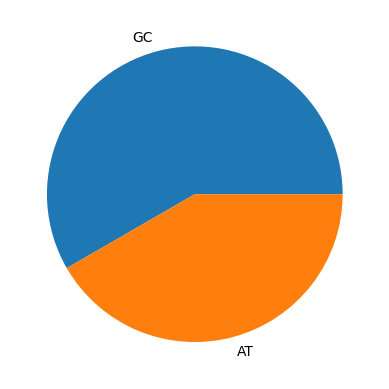

In [55]:
data = [gc_content(seqA), at_content(seqA)]
label = ['GC', 'AT']
plt.pie(data, labels = label)

([<matplotlib.patches.Wedge at 0x1dd54d3a5f0>,
 [Text(-0.21459935421774104, 1.0788638084435536, 'GC'),
  Text(0.21459935421774115, -1.0788638084435536, 'AT')])

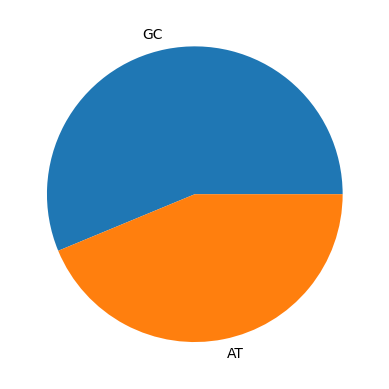

In [56]:
data = [gc_content(seqB), at_content(seqB)]
label = ['GC', 'AT']
plt.pie(data, labels = label)

<BarContainer object of 3 artists>

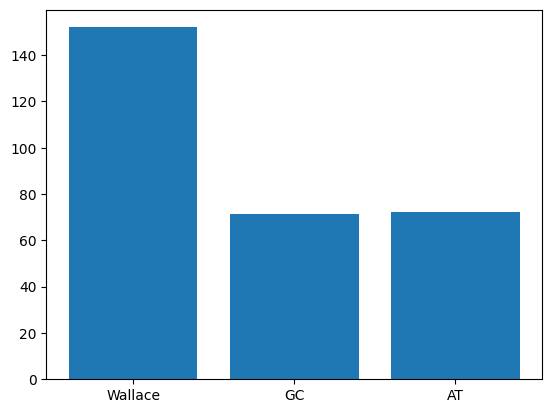

In [57]:
# Barchart
# Dictionary
data = {
    'Wallace': mt.Tm_Wallace(seqA),
    'GC': mt.Tm_GC(seqA),
    'AT': mt.Tm_NN(seqB)
}
plt.bar(data.keys(), data.values())